In [28]:
%matplotlib inline

# 1. Example

In [53]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt

trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

X = T.scalar()
Y = T.scalar()

def model(X, w):
    return X * w

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w)

In [54]:
cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost=cost, wrt=w)
updates = [[w, w - gradient * 0.01]]

In [55]:
train = theano.function(
    inputs=[X, Y], 
    outputs=cost, 
    updates=updates, 
    allow_input_downcast=True)

In [69]:
ws = [0.]
w.set_value(np.asarray(0., dtype=theano.config.floatX))
for i in range(10):
    for x, y in zip(trX, trY):
        train(x, y)
    ws.append( float(w.get_value()) )    
    print w.get_value()   

1.01063752174
1.51701974869
1.77074444294
1.89787387848
1.96157228947
1.99348819256
2.00947999954
2.01749324799
2.0215075016
2.02351999283


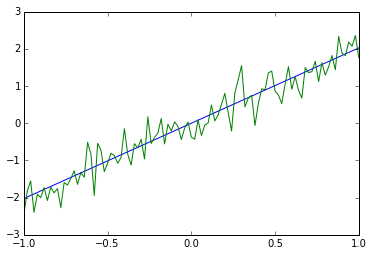

In [75]:
x = np.linspace(-1, 1, 100)
y = w.get_value()*x
plt.plot(x, y)
plt.plot(trX, trY)
plt.show()

# 2. Some explanations

In [35]:
type(X)

theano.tensor.var.TensorVariable

In [36]:
X.type

TensorType(float32, scalar)

In [38]:
bar = X ** 2
theano.pp(bar)

'(<TensorType(float32, scalar)> ** TensorConstant{2})'

In [42]:
shared_var = theano.shared(np.array([[1, 2], [3, 4]], dtype=theano.config.floatX))
shared_var.type

CudaNdarrayType(float32, matrix)

0.0
1.01063752174
1.51701974869
1.77074444294
1.89787387848
1.96157228947
1.99348819256
2.00947999954
2.01749324799
2.0215075016
2.02351999283


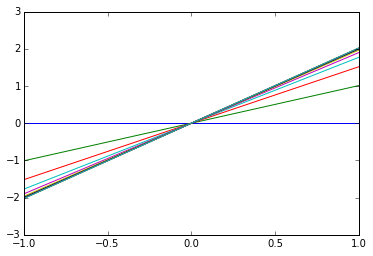

In [77]:
for wi in ws:
    print wi
    plt.plot(x, wi*x)
plt.show()

In [82]:
aa = T.scalar()
bb = aa ** 2
T.grad(bb, aa).eval({aa: 50})

array(100.0, dtype=float32)

In [64]:
a

array(1)